Aim build a dataframe with location depth, dates, actual bathymetry, model bathumetry, and state of the sample

This file has to be ready to be read for the simulations

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import xarray as xr
import cmocean

In [3]:
bathy_file = '/storage/shared/oceanparcels/input_data/MOi/domain_ORCA0083-N006/bathymetry_ORCA12_V3.3.nc'
bathy_moi = xr.load_dataset(bathy_file)

In [4]:
w_grid = xr.load_dataset('/storage/shared/oceanparcels/input_data/MOi/psy4v3r1/psy4v3r1-daily_W_2019-12-02.nc')

In [5]:
lat = bathy_moi['nav_lat'] 
lon = bathy_moi['nav_lon'] 

bathy_depth = bathy_moi['Bathymetry']

landmask = bathy_moi['mask']

masked_bathy = np.ma.masked_where(landmask==0, bathy_depth)

masked_land = np.ma.masked_where(landmask==1, landmask)

In [6]:
w_moi = w_grid['vovecrtz']
depthw = w_grid['depthw'].values

depth_grid = np.zeros_like(bathy_depth, dtype=int) + 50

for i in range(w_moi.shape[0]-1, -1, -1):
    nan_mask = np.isnan(w_moi[i].values)
    depth_grid -= nan_mask

    
depth_grid = depthw[depth_grid]
masked_wgrid = np.ma.masked_where(landmask==0, depth_grid)

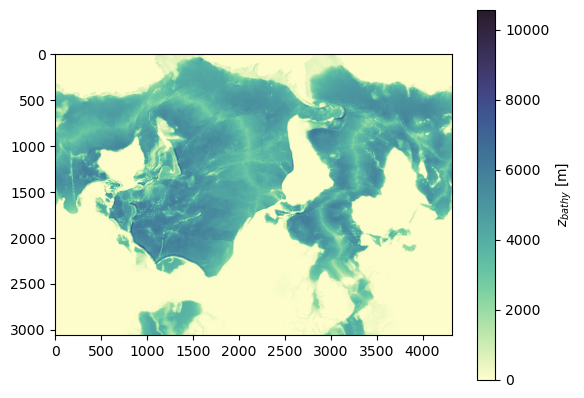

In [7]:
im = plt.imshow(bathy_depth, cmap=cmocean.cm.deep)

plt.colorbar(im, label=r'$z_{bathy}$ [m]')

# plt.title('Expedition campaign PE448')


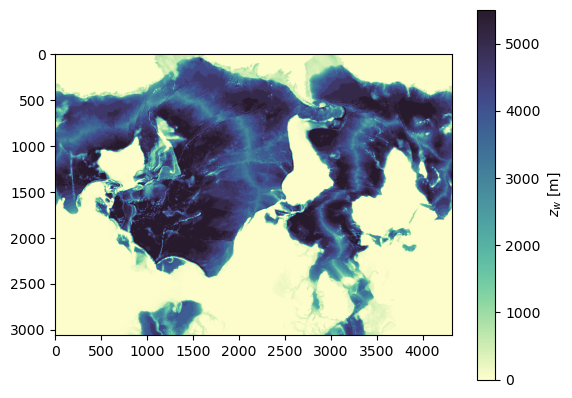

In [73]:
im = plt.imshow(depth_grid, cmap=cmocean.cm.deep)

plt.colorbar(im, label=r'$z_{w}$ [m]')

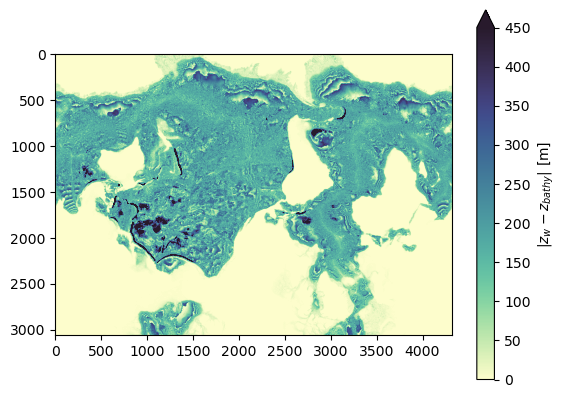

In [8]:
im = plt.imshow(abs(depth_grid - bathy_depth), cmap=cmocean.cm.deep, vmin=0, vmax=450)

plt.colorbar(im, label=r'$|z_{w} - z_{bathy}|$ [m]', extend='max')



In [9]:
ds = xr.Dataset(
    data_vars=dict(
        depth_zgrid = (["y", "x"], depth_grid),
        nav_lat=(["y", "x"], bathy_moi['nav_lat'].values),
        nav_lon=(["y", "x"], bathy_moi['nav_lon'].values),),

    attrs=dict(description="Depth of the vertical boundary in the MOi ORCA12_V3.3."))

ds.to_netcdf('~/depth_zgrid_ORCA12_V3.3.nc')


In [10]:
test = xr.load_dataset('~/depth_zgrid_ORCA12_V3.3.nc')

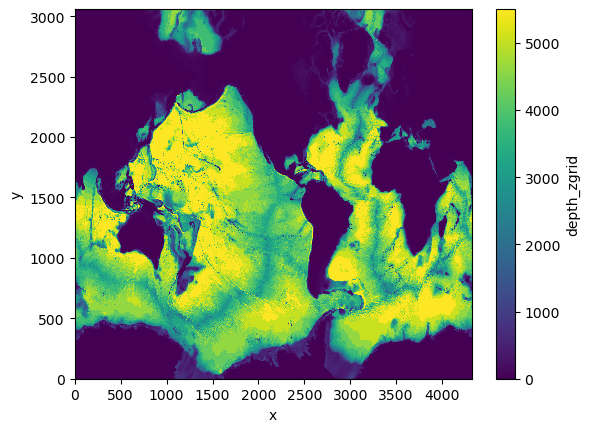

In [11]:
test['depth_zgrid'].plot()

In [14]:
w_grid = xr.load_dataset('/storage/shared/oceanparcels/input_data/MOi/psy4v3r1/psy4v3r1-daily_W_2019-12-02.nc')

In [13]:
u_grid = xr.load_dataset('/storage/shared/oceanparcels/input_data/MOi/psy4v3r1/psy4v3r1-daily_U_2019-12-02.nc')

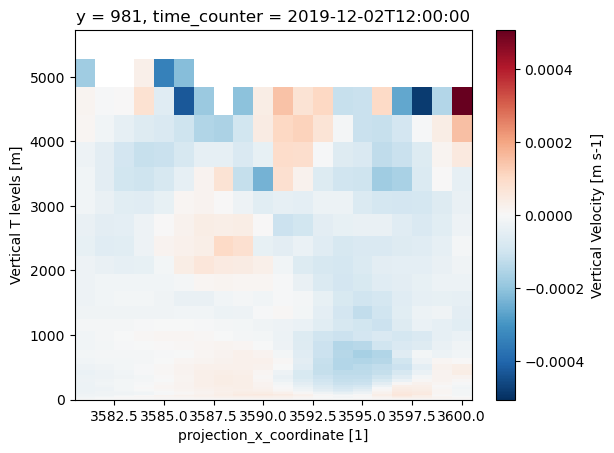

In [18]:
w_grid['vovecrtz'][:, 980, slice(3580, 3600)].plot()

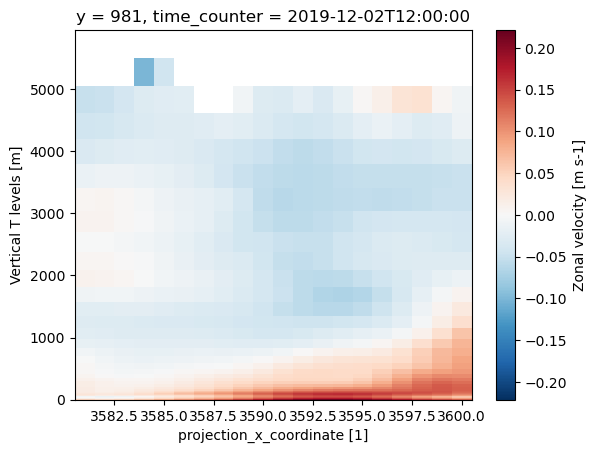

In [19]:
u_grid['vozocrtx'][:, 980, slice(3580, 3600)].plot()